## Analyze Results:

I will use the full train results with using dence layers. 

* Load csv file. 
* Categorize the results by MAPE
* Check the correlation between MAPE and other features.


### Import libraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper_functions import subplot_by_category

In [2]:
df = pd.read_csv("dense_results_full_data.csv")
df.describe()

,Country,MAPE,Density,Active
count,3135.000000,3135.000000,3135.000000,3.135000e+03
mean,30376.037640,27.996707,3.918186,6.604037e+03
std,15145.862593,1269.835687,6.173361,3.353639e+04
min,1001.000000,0.175896,0.000000,0.000000e+00
25%,18178.000000,1.800255,1.658691,1.455000e+02
50%,29173.000000,3.101383,2.587083,4.890000e+02
75%,45076.000000,5.295601,4.545713,2.139500e+03
max,56045.000000,71091.580000,217.587110,1.137607e+06


In [3]:
df.head()

,Country,MAPE,Density,Active,forecast
0,1001,1.504614,3.334431,1417,[3.3091352 3.31727028 3.32801533 3.33693123 3...
1,1003,4.143341,7.823300,13401,[7.85833788 7.88518858 7.90744925 7.90828514 7...
2,1005,1.395184,1.206827,239,[1.16141069 1.16513038 1.17019248 1.18426347 1...
3,1007,5.228748,1.236650,220,[1.22299695 1.22010887 1.22093809 1.21361172 1...
4,1009,1.442244,1.777708,789,[1.75237012 1.76360607 1.77065146 1.7765491 1...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   3135 non-null   int64  
 1   MAPE      3135 non-null   float64
 2   Density   3135 non-null   float64
 3   Active    3135 non-null   int64  
 4   forecast  3135 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 122.6+ KB


In [5]:
type(df.iloc[0]['forecast'][0])

str

In [6]:
df.corr()

,Country,MAPE,Density,Active
Country,1.000000,-0.002846,-0.012039,-0.063454
MAPE,-0.002846,1.000000,-0.001277,-0.002955
Density,-0.012039,-0.001277,1.000000,0.284922
Active,-0.063454,-0.002955,0.284922,1.000000


Same as sample data, there are no correlation between MAPE to other variables. 

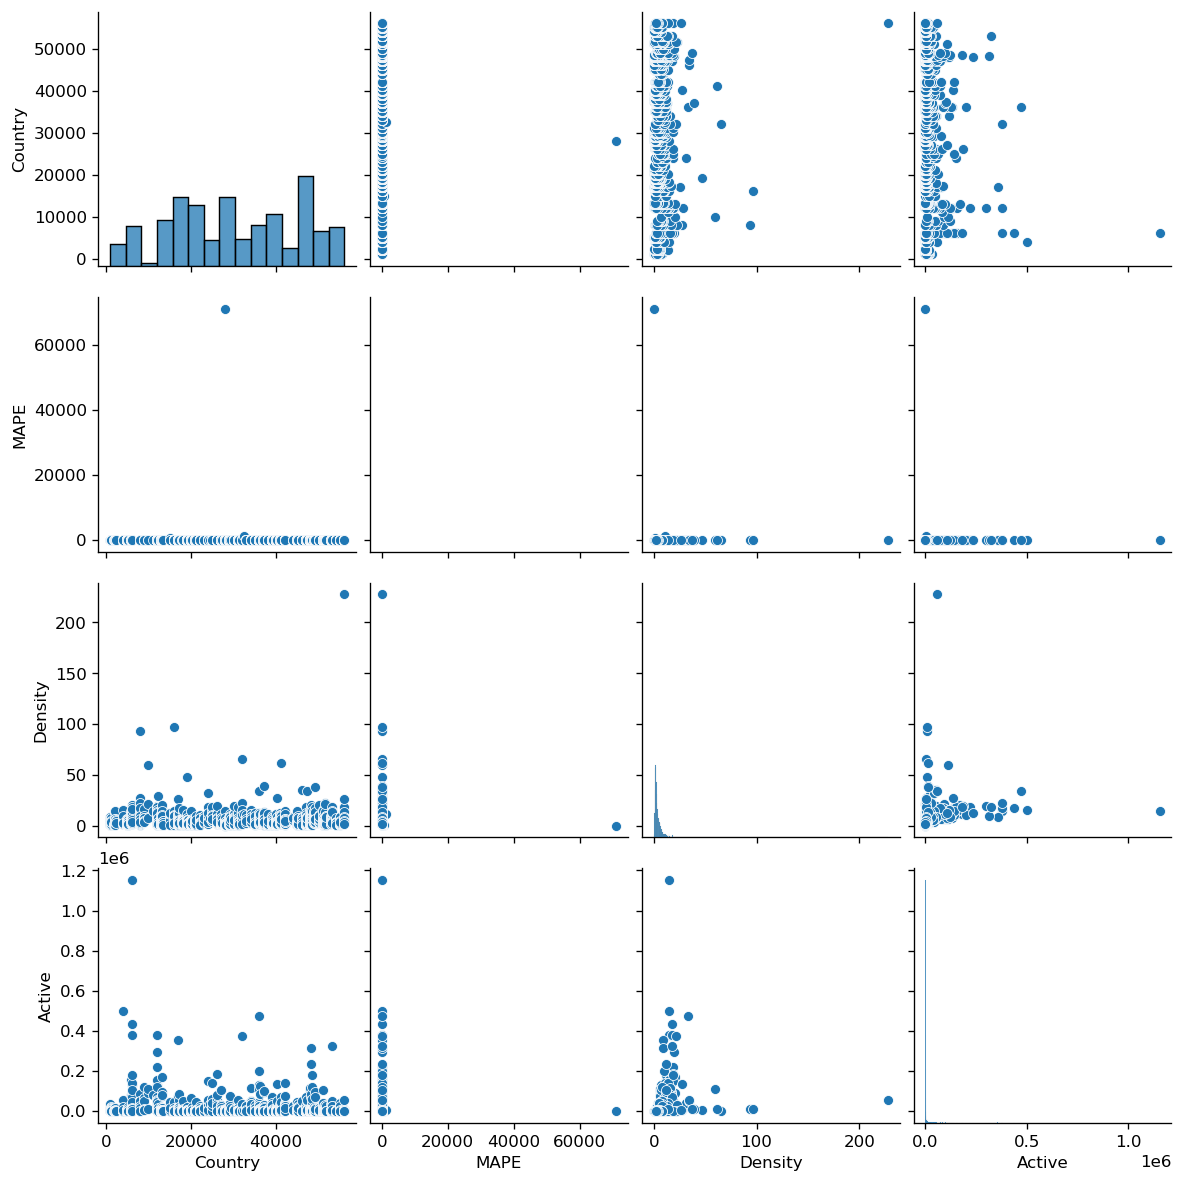

In [4]:
sns.pairplot(df)

In [7]:
df['category'] = pd.cut(df['MAPE'], bins=[0, 1.5, max(df['MAPE'])], labels=[1, 2])

In [8]:
df.groupby('category').agg({'MAPE': ['count', 'mean', 'min', 'max'],
                           "Density": ['min', 'max', 'std'],
                           'Active': ['min', 'max', 'std']})

MAPE                                      Density              \
         count       mean       min           max       min         max   
category                                                                  
1          609   1.032528  0.175896      1.499255  0.250684   35.646767   
2         2526  34.497572  1.502808  71091.580000  0.000000  217.587110   

                   Active                         
               std    min      max           std  
category                                          
1         3.826604      1   489925  34716.384114  
2         6.610979      0  1137607  33244.758576

Category: 1
Length of DataFrame: 609


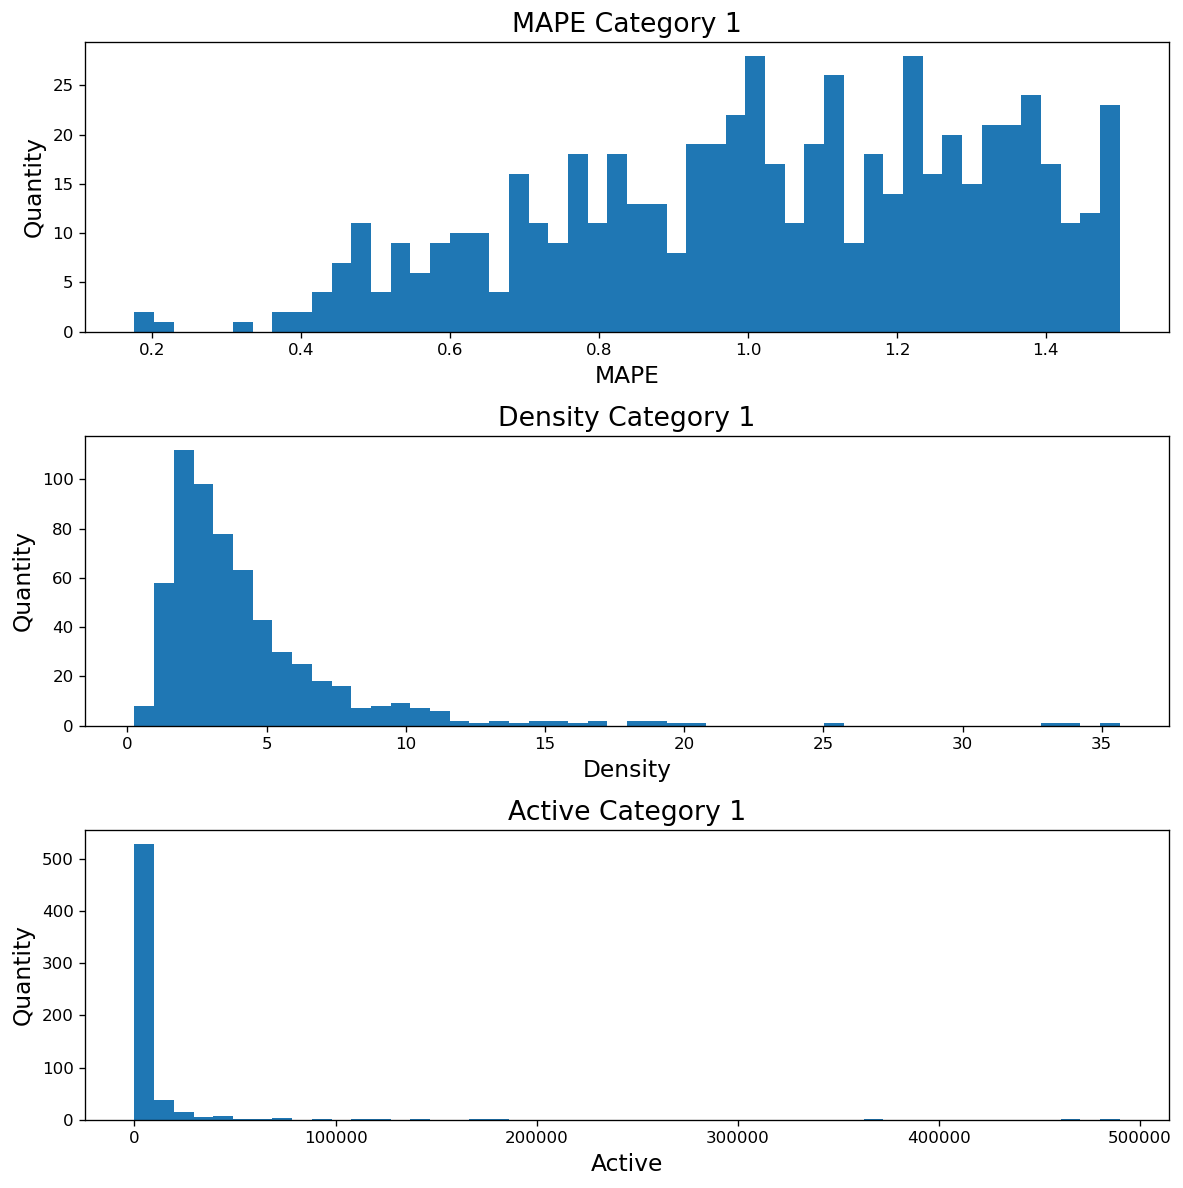

Category: 2
Length of DataFrame: 2526


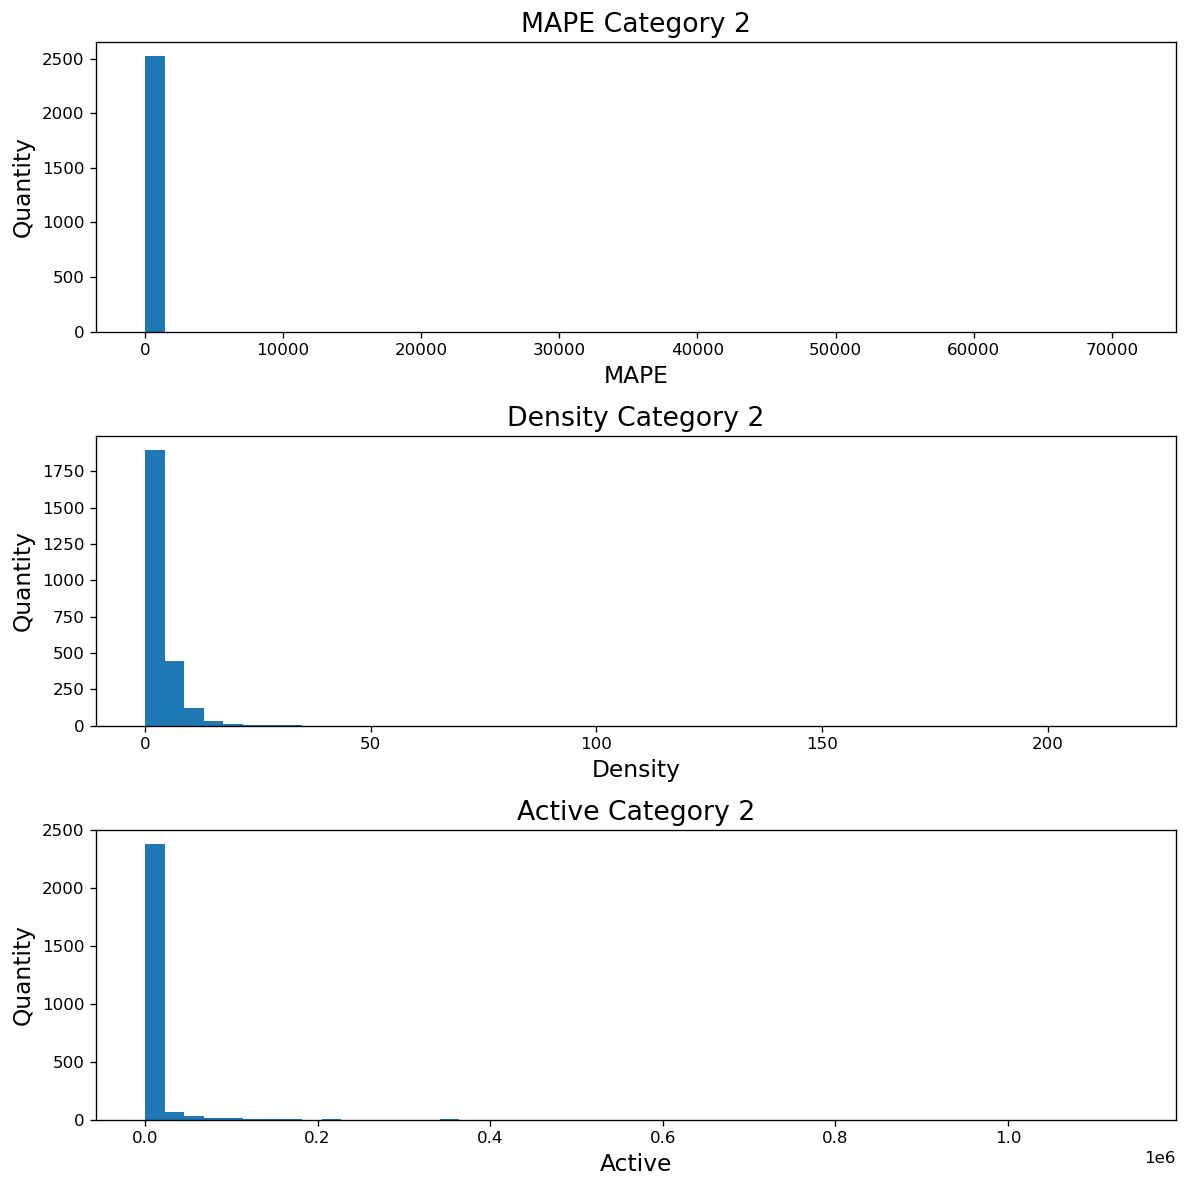

In [9]:
for i in range(1, 3):
    subplot_by_category(df, i)

In [10]:
df.head()

,Country,MAPE,Density,Active,forecast,category
0,1001,1.504614,3.334431,1417,[3.3091352 3.31727028 3.32801533 3.33693123 3...,2
1,1003,4.143341,7.823300,13401,[7.85833788 7.88518858 7.90744925 7.90828514 7...,2
2,1005,1.395184,1.206827,239,[1.16141069 1.16513038 1.17019248 1.18426347 1...,1
3,1007,5.228748,1.236650,220,[1.22299695 1.22010887 1.22093809 1.21361172 1...,2
4,1009,1.442244,1.777708,789,[1.75237012 1.76360607 1.77065146 1.7765491 1...,1


In [11]:
df.to_csv("result_dense_with_category.csv", index=False)

### Things to do:

* Check category 2 with same values for prediction. 
    See if the score beat the results. 
* Based on the results, I will tweek the category boundry to maximize the MAPE. 

In [12]:
# Obtain the cfips on category 2
cfips_category2 = df[df['category'] == 2]['Country'].unique()

In [13]:
category_1 = 0
category_2 = 0
for i in range(len(df)):
    # If the cfips in the category 2, then train with linear regression and update MAPE
    if df['Country'][i] in cfips_category2:
        category_2 += 1
    # If category 1, keep the MAPE score
    else:
        category_1 += 1
print(f"number category 1: {category_1}\nnumber category 2: {category_2}")

number category 1: 609
number category 2: 2526


In [14]:
df[df["Country"] == 1001]['MAPE']

0    1.504614
Name: MAPE, dtype: float64

In [15]:
df['Country'].iloc[0]

1001